In [7]:
import pickle
import numpy as np
import pandas as pd
import chess.pgn
import pandas as pd
pd.options.display.max_columns=999
import datetime
import tqdm
import zipfile
import re
from stockfish import Stockfish
import chess
import chess.engine
import chess.svg
import chess.pgn
import re
import numpy as np
import pandas as pd
from statsmodels.distributions.empirical_distribution import ECDF
from scipy import stats
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

import matplotlib.pyplot as plt
#!pip install chess
#!pip install Stockfish


In [81]:
def save_list(list_save, file_path):
    with open(file_path, 'wb') as file:
        pickle.dump(list_save, file)

def load_list(file_path):
    with open(file_path, 'rb') as file:
        chess_data = pickle.load(file)
    return chess_data
import matplotlib.pyplot as plt

def create_histogram(data, piece = 0, row = 0, col = 0, color = 0):
    # Create a histogram
    plt.hist(data, bins='auto', alpha=0.7, rwidth=0.85)

    # Set labels and title
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    tit = "Distribution of "
    if color == 0:
        tit = tit + "White "
    else:
        tit = tit + "Black "
    if piece == 0:
        tit = tit + "Knight "
    else:
        tit = tit + "Bishop "
    tit = tit + "at (" + str(col + 1) + "," + str(row + 1) + ")"
    plt.title(tit)

    # Display the histogram
    plt.show()
def winning_chance(cpl):
    cpl = cpl / 100
    win = 10 ** (cpl / 4)
    perc = win / (1 + win)
    return perc

In [82]:
#0 = knight, 1, a, white
df = load_list('data/carlsen_final_all.pkl')


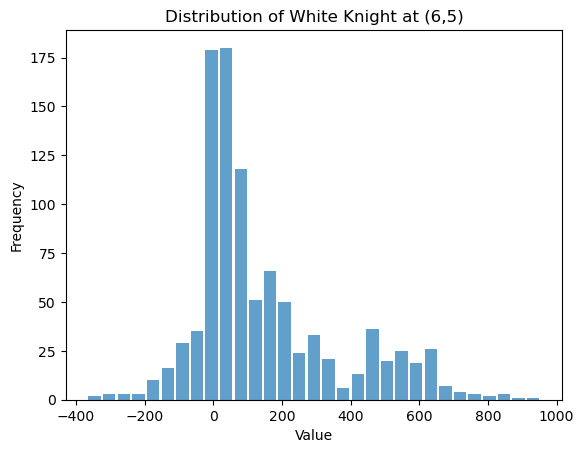

In [83]:
create_histogram(df[0][4][5][0],0,4,5,0)

In [64]:
# import pandas as pd

# # Empty lists to store the extracted information
# pieces = []
# colors = []
# rows = []
# columns = []
# evaluations = []
# # Iterate over each element in df
# for a in range(2):
#     for b in range(8):
#         for c in range(8):
#             for d in range(2):
#                 for ev in df[a][b][c][d]:
#                     if a == 0:
#                         piece = 0
#                     else:
#                         piece = 1
#                     row = b + 1
#                     column = c + 1
#                     if d == 0:
#                         color = 0
#                     else:
#                         color = 1
# #                Append the extracted information to the lists
#                     pieces.append(piece)
#                     colors.append(color)
#                     rows.append(row)
#                     columns.append(column)
#                     evaluations.append(ev)

# # Create a new DataFrame using the extracted information
# data = pd.DataFrame({'piece': pieces, 'color': colors, 'row': rows, 'column': columns, 'CPL': evaluations})

# # Convert 'row' column to numeric
# data['row'] = pd.to_numeric(data['row'])

# # Print the new DataFrame
# data.head()

# # Define the file path and name
file_path = 'data/carlsen_dataframe.csv'

# # # Export the DataFrame to a CSV file
# data.to_csv(file_path, index=False)
data= pd.read_csv(file_path)

In [65]:
data.describe()

,piece,color,row,column,CPL
count,273810.000000,273810.000000,273810.000000,273810.000000,273810.000000
mean,0.521088,0.488518,4.847128,4.137906,32.739312
std,0.499556,0.499869,2.242895,1.736286,174.790033
min,0.000000,0.000000,1.000000,1.000000,-4434.000000
25%,0.000000,0.000000,3.000000,3.000000,0.000000
50%,1.000000,0.000000,5.000000,4.000000,29.000000
75%,1.000000,1.000000,7.000000,6.000000,58.000000
max,1.000000,1.000000,8.000000,8.000000,4505.000000


In [66]:
data.head()

,piece,color,row,column,CPL
0,0,0,1,1,0
1,0,0,1,1,70
2,0,0,1,1,80
3,0,0,1,1,79
4,0,0,1,1,114


In [67]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

# Define the input shape
input_shape = (4,)  # Assuming you have 4 input columns: piece, color, row, and column
# Create the model
model = Sequential([
    Dense(64, activation='tanh', input_shape=input_shape),
    Dense(32, activation='tanh'),
    Dense(1)  # Output layer with a single neuron (predicting CPL)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Convert the dataframe to NumPy arrays
X = data[['piece', 'color', 'row', 'column']].values
y = data['CPL'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 40000)


# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)  # Adjust the number of epochs and batch size as needed


Epoch 1/10
6846/6846 [==============================] - 6s 860us/step - loss: 30602.7207
Epoch 2/10
6846/6846 [==============================] - 6s 814us/step - loss: 30007.1270
Epoch 3/10
6846/6846 [==============================] - 6s 870us/step - loss: 29900.6055
Epoch 4/10
6846/6846 [==============================] - 6s 876us/step - loss: 29829.9570
Epoch 5/10
6846/6846 [==============================] - 6s 896us/step - loss: 29783.9512
Epoch 6/10
6846/6846 [==============================] - 6s 816us/step - loss: 29749.0938
Epoch 7/10
6846/6846 [==============================] - 6s 843us/step - loss: 29728.2559
Epoch 8/10
6846/6846 [==============================] - 6s 903us/step - loss: 29717.8887
Epoch 9/10
6846/6846 [==============================] - 7s 1ms/step - loss: 29702.3711
Epoch 10/10
6846/6846 [==============================] - 6s 942us/step - loss: 29692.2344


In [68]:
mse = model.evaluate(X_test, y_test)
rmse = np.sqrt(mse)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (MSE):", rmse)

1712/1712 [==============================] - 2s 1ms/step - loss: 27492.5449
Mean Squared Error (MSE): 27492.544921875
Root Mean Squared Error (MSE): 165.80876008786447


In [69]:
import pandas as pd

# Assuming you have a dataframe named 'data' with the input columns: piece, color, row, and column
# Convert the dataframe to NumPy arrays
X = data[['piece', 'color', 'row', 'column']].values

# Get the predictions for all inputs
predictions = model.predict(X)

# Create a new dataframe with the original inputs and their corresponding predictions
prediction_df = pd.DataFrame(data=X, columns=['piece', 'color', 'row', 'column'])
prediction_df['CPL_predicted'] = predictions
prediction_df = prediction_df.drop_duplicates()

# Print the prediction dataframe
print(prediction_df)


8557/8557 [==============================] - 9s 1ms/step
        piece  color  row  column  CPL_predicted
0           0      0    1       1     -10.582844
47          0      1    1       1    -105.977287
73          0      0    1       2      31.728834
4327        0      1    1       2    -108.459885
4345        0      0    1       3      21.506842
...       ...    ...  ...     ...            ...
268642      1      1    8       6      13.679665
273528      1      0    8       7     121.107666
273573      1      1    8       7       6.967561
273689      1      0    8       8     121.102806
273737      1      1    8       8       4.986279

[256 rows x 5 columns]


In [70]:
prediction_df.describe()

,piece,color,row,column,CPL_predicted
count,256.000000,256.000000,256.000000,256.000000,256.000000
mean,0.500000,0.500000,4.500000,4.500000,21.614744
std,0.500979,0.500979,2.295776,2.295776,64.988564
min,0.000000,0.000000,1.000000,1.000000,-115.643631
25%,0.000000,0.000000,2.750000,2.750000,-20.039272
50%,0.500000,0.500000,4.500000,4.500000,22.741591
75%,1.000000,1.000000,6.250000,6.250000,67.594893
max,1.000000,1.000000,8.000000,8.000000,121.107666


In [71]:
# Assuming prediction_df is the dataframe containing the predictions

# Filter the dataframe based on 'piece' and 'color'
white_knight_df = prediction_df[(prediction_df['piece'] == 0) & (prediction_df['color'] == 0)].copy()

# Reset the index of white_knight_df if desired
white_knight_df.reset_index(drop=True, inplace=True)

# Print the white_knight_df
white_knight_df.describe()

,piece,color,row,column,CPL_predicted
count,64.0,64.0,64.000000,64.000000,64.000000
mean,0.0,0.0,4.500000,4.500000,67.111702
std,0.0,0.0,2.309401,2.309401,39.726673
min,0.0,0.0,1.000000,1.000000,-10.582844
25%,0.0,0.0,2.750000,2.750000,36.287294
50%,0.0,0.0,4.500000,4.500000,66.181595
75%,0.0,0.0,6.250000,6.250000,106.279991
max,0.0,0.0,8.000000,8.000000,121.098816


In [72]:
white_knight_df.head()

,piece,color,row,column,CPL_predicted
0,0,0,1,1,-10.582844
1,0,0,1,2,31.728834
2,0,0,1,3,21.506842
3,0,0,1,4,31.351599
4,0,0,1,5,20.939371


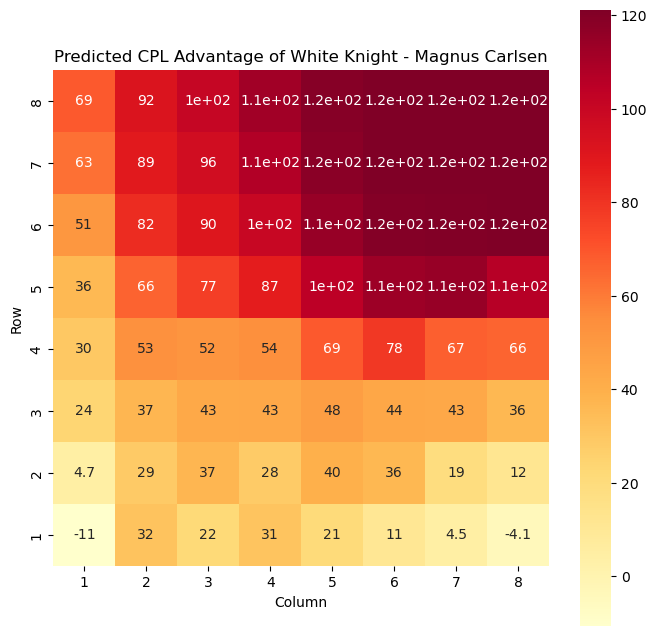

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming white_knight_df is the dataframe containing the data

# Reshape the dataframe to have rows and columns as indices
heatmap_df = white_knight_df.pivot(index='row', columns='column', values='CPL_predicted')

# Convert the index and column labels to integers
heatmap_df.index = heatmap_df.index.astype(int)
heatmap_df.columns = heatmap_df.columns.astype(int)

# Reverse the order of the rows and rename the row index
heatmap_df = heatmap_df.iloc[::-1]
heatmap_df.index = range(1, heatmap_df.index.max() + 1)

# Create a numpy array from the dataframe values
heatmap_data = heatmap_df.values

# Create the heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlOrRd', cbar=True, square=True)

# Set the axis labels
plt.xlabel('Column')
plt.ylabel('Row')

# Set the tick labels for x-axis (columns)
plt.xticks(np.arange(len(heatmap_df.columns)) + 0.5, heatmap_df.columns)

# Set the tick labels for y-axis (rows) in reverse order
plt.yticks(np.arange(len(heatmap_df.index)) + 0.5, heatmap_df.index[::-1])

# Add a title to the heatmap
plt.title('Predicted CPL Advantage of White Knight - Magnus Carlsen')

# Show the plot
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming white_knight_df is the dataframe containing the data

# Reshape the dataframe to have rows and columns as indices
heatmap_df = white_knight_df.pivot(index='row', columns='column', values='CPL_predicted')

# Convert the index and column labels to integers
heatmap_df.index = heatmap_df.index.astype(int)
heatmap_df.columns = heatmap_df.columns.astype(int)

# Reverse the order of the rows and rename the row index
heatmap_df = heatmap_df.iloc[::-1]
heatmap_df.index = range(1, heatmap_df.index.max() + 1)

# Create a numpy array from the dataframe values
heatmap_data = heatmap_df.values

# Create the heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlOrRd', cbar=True, square=True)

# Set the axis labels
plt.xlabel('Column')
plt.ylabel('Row')

# Set the tick labels for x-axis (columns)
plt.xticks(np.arange(len(heatmap_df.columns)) + 0.5, heatmap_df.columns)

# Set the tick labels for y-axis (rows) in reverse order
plt.yticks(np.arange(len(heatmap_df.index)) + 0.5, heatmap_df.index[::-1])

# Add a title to the heatmap
plt.title('Predicted CPL Advantage of White Knight - Magnus Carlsen')

# Show the plot
plt.show()


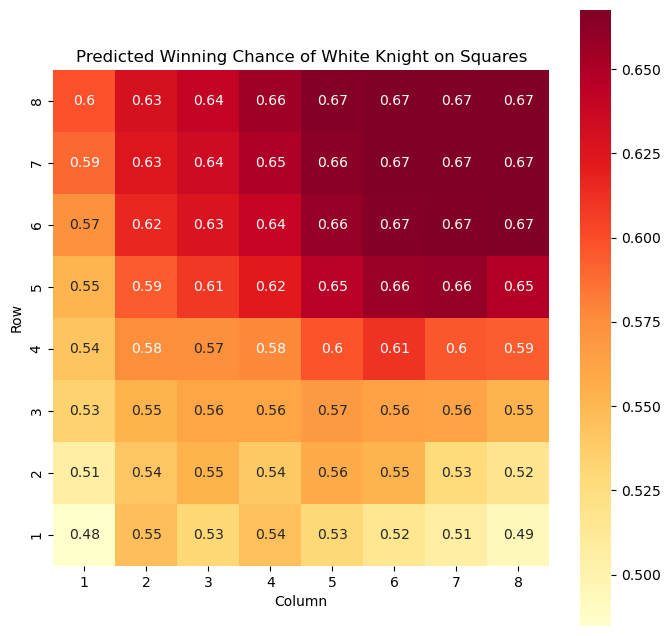

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Reshape the dataframe to have rows and columns as indices
heatmap_df = white_knight_df.pivot(index='row', columns='column', values='CPL_predicted')

# Convert the index and column labels to integers
heatmap_df.index = heatmap_df.index.astype(int)
heatmap_df.columns = heatmap_df.columns.astype(int)

# Reverse the order of the rows and rename the row index
heatmap_df = heatmap_df.iloc[::-1]
heatmap_df.index = range(1, heatmap_df.index.max() + 1)

# Apply the winning_chance function to replace values in the heatmap
heatmap_df = heatmap_df.apply(winning_chance)

# Create a numpy array from the dataframe values
heatmap_data = heatmap_df.values

# Create the heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlOrRd', cbar=True, square=True)

# Set the axis labels
plt.xlabel('Column')
plt.ylabel('Row')

# Set the tick labels for x-axis (columns)
plt.xticks(np.arange(len(heatmap_df.columns)) + 0.5, heatmap_df.columns)

# Set the tick labels for y-axis (rows) in reverse order
plt.yticks(np.arange(len(heatmap_df.index)) + 0.5, heatmap_df.index[::-1])

# Add a title to the heatmap
plt.title('Predicted Winning Chance of White Knight on Squares')

# Show the plot
plt.show()
